In [1]:
import adaptsam
import tifffile as tif

# Prepare the predictor by loading SAM2
model_cfg = "configs/sam2.1/sam2.1_hiera_b+.yaml"
sam2_checkpoint = "../checkpoints/sam2.1_hiera_base_plus.pt"
predictor = adaptsam.AdaptSAMPredictor(model_cfg, sam2_checkpoint)

using device: cuda


In [2]:
# Load data
data_path = "data/img_0000_0576_0768.tif"
mat = tif.imread(data_path)

In [3]:
# Create a point prompt
# Same axis order as mat
point_prompt = [26, 31, 29]

# Predict on the full matrix with the point prompt
prediction = predictor.predict(mat, point_prompt)

tif.imwrite("predicted.tif", prediction)

propagate in video:  21%|██        | 7/33 [00:08<00:30,  1.17s/it]


[[[85. 85. 85. ... 85. 85. 85.]
  [85. 85. 85. ... 85. 85. 85.]
  [85. 85. 85. ... 85. 85. 85.]
  ...
  [85. 85. 85. ... 85. 85. 85.]
  [85. 85. 85. ... 85. 85. 85.]
  [85. 85. 85. ... 85. 85. 85.]]

 [[85. 85. 85. ... 85. 85. 85.]
  [85. 85. 85. ... 85. 85. 85.]
  [85. 85. 85. ... 85. 85. 85.]
  ...
  [85. 85. 85. ... 85. 85. 85.]
  [85. 85. 85. ... 85. 85. 85.]
  [85. 85. 85. ... 85. 85. 85.]]

 [[85. 85. 85. ... 85. 85. 85.]
  [85. 85. 85. ... 85. 85. 85.]
  [85. 85. 85. ... 85. 85. 85.]
  ...
  [85. 85. 85. ... 85. 85. 85.]
  [85. 85. 85. ... 85. 85. 85.]
  [85. 85. 85. ... 85. 85. 85.]]

 ...

 [[85. 85. 85. ... 85. 85. 85.]
  [85. 85. 85. ... 85. 85. 85.]
  [85. 85. 85. ... 85. 85. 85.]
  ...
  [ 0. 85.  0. ...  0.  0.  0.]
  [ 0. 85.  0. ...  0.  0.  0.]
  [ 0. 85.  0. ...  0.  0.  0.]]

 [[85. 85. 85. ... 85. 85. 85.]
  [85. 85. 85. ... 85. 85. 85.]
  [85. 85. 85. ... 85. 85. 85.]
  ...
  [ 0. 85.  0. ...  0.  0.  0.]
  [ 0. 85.  0. ...  0.  0.  0.]
  [ 0. 85.  0. ...  0.  0.  

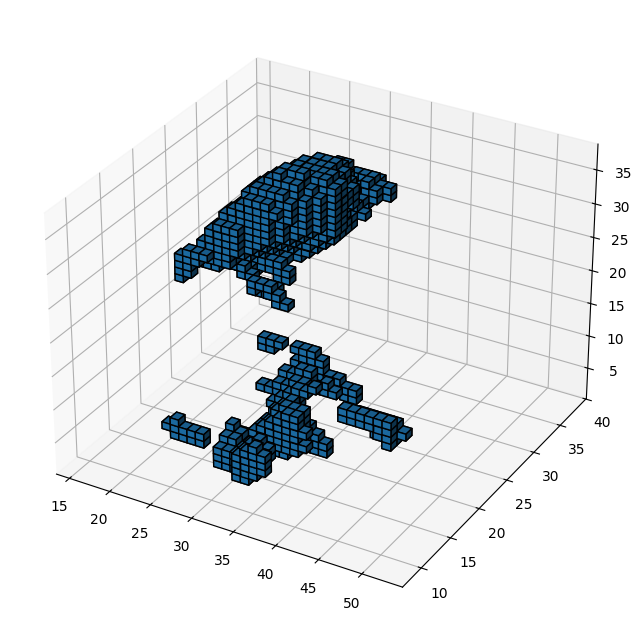

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.voxels(prediction > 127, edgecolor='k')

plt.show()